# Exercise 1: Interactive Community Detection Visualization
Create a random network and apply two different community detection algorithms (e.g., Girvan-Newman and Louvain). Implement an interactive visualization where users can toggle between algorithms to view community structures with distinct colors.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from ipywidgets import interact

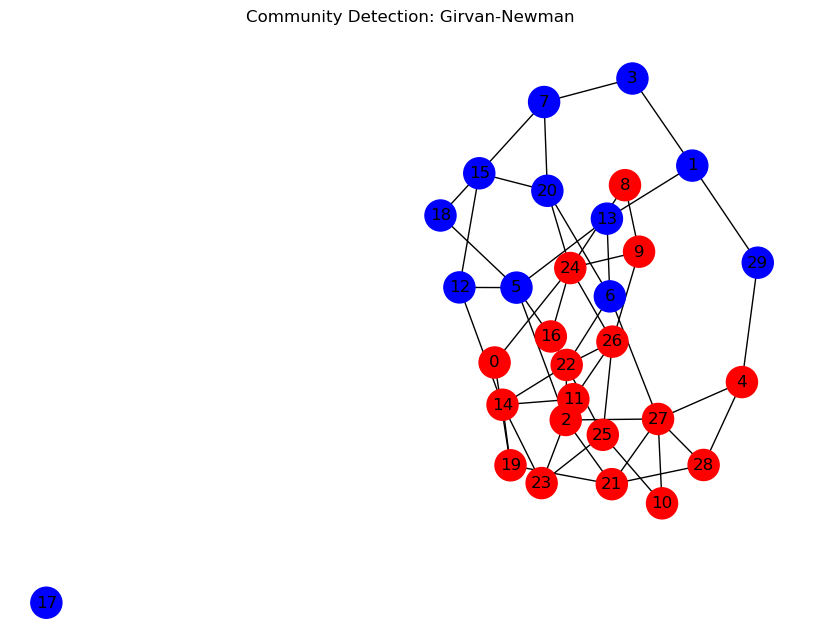

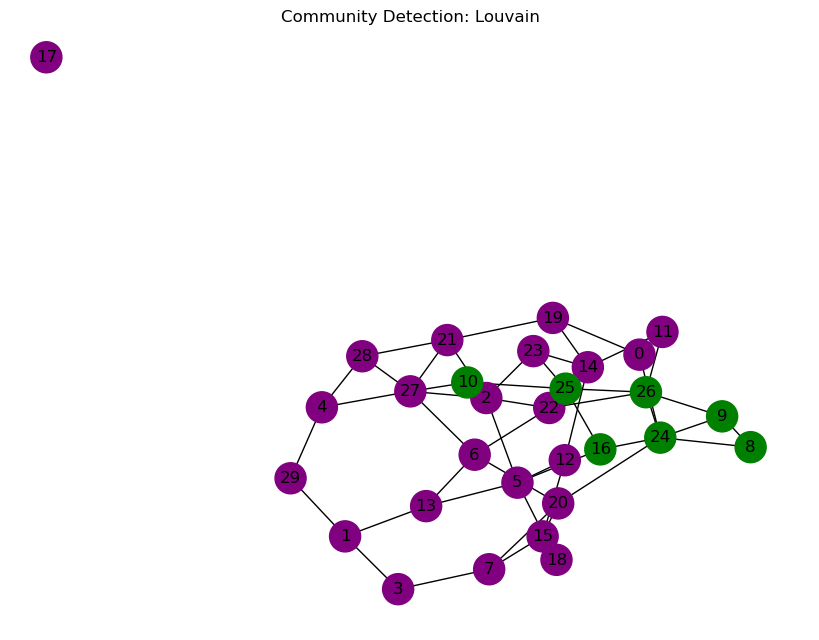

In [16]:
# Generate a random graph
G = nx.erdos_renyi_graph(30, 0.1)

# Calculate communities with different algorithms
communities_girvan_newman = next(community.girvan_newman(G))
communities_louvain = community.greedy_modularity_communities(G)

# Assign colors based on community membership
def draw_community_graph(algorithm):
    color_map = []
    if algorithm == "Girvan-Newman":
        for node in G:
            if node in communities_girvan_newman[0]:
                color_map.append('red')
            else:
                color_map.append('blue')
    elif algorithm == "Louvain":
        for node in G:
            if node in communities_louvain[0]:
                color_map.append('green')
            else:
                color_map.append('purple')

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500)
    plt.title(f"Community Detection: {algorithm}")
    plt.show()


draw_community_graph(algorithm="Girvan-Newman")
draw_community_graph(algorithm="Louvain")

# Exercise 2: Mapping Real-World Transport Routes on a Geospatial Network
Build a network of major airports around the world, with connections representing popular travel routes. Place the network on a world map using geographic coordinates for nodes and add distinguishing features, such as colors or line thickness, for different routes.

Hint: Sample data and the edges are provided below

G = nx.Graph()

G.add_node("JFK", pos=(-73.7781, 40.6413))  # New York

G.add_node("LHR", pos=(-0.4543, 51.4700))   # London

G.add_node("DXB", pos=(55.3644, 25.2528))   # Dubai

G.add_node("HND", pos=(139.7811, 35.5494))  # Tokyo

G.add_edges_from([("JFK", "LHR"), ("LHR", "DXB"), ("DXB", "HND"), ("JFK", "DXB")])

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_6872/3600133190.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


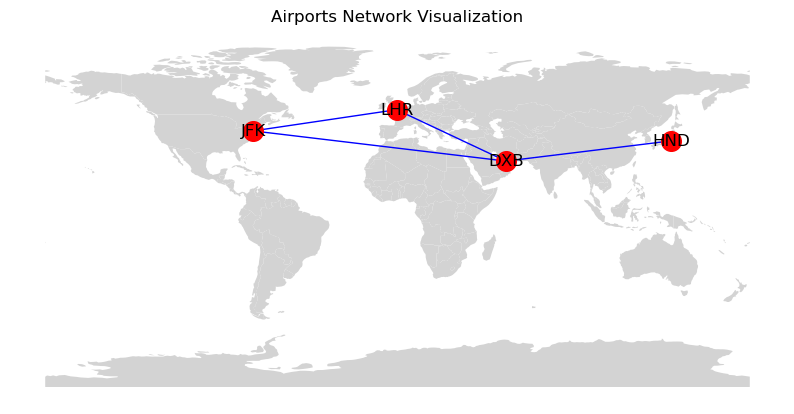

In [4]:
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Example: Airports network
G = nx.Graph()
# Add nodes with geographic positions
G.add_node("JFK", pos=(-73.7781, 40.6413))  # New York
G.add_node("LHR", pos=(-0.4543, 51.4700))   # London
G.add_node("DXB", pos=(55.3644, 25.2528))   # Dubai
G.add_node("HND", pos=(139.7811, 35.5494))  # Tokyo

# Add edges representing routes
G.add_edges_from([("JFK", "LHR"), ("LHR", "DXB"), ("DXB", "HND"), ("JFK", "DXB")])

# Extract positions
pos = nx.get_node_attributes(G, 'pos')

# Plot world map and transport network
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgrey')
nx.draw(G, pos, ax=ax, with_labels=True, node_color="red", edge_color="blue", node_size=200)
plt.title("Airports Network Visualization")
plt.show()


# Exercise 3: Visualizing Network Centrality Measures
Generate a random graph and calculate three different centrality measures: degree, closeness, and betweenness. Create an interactive visualization where the node sizes reflect each centrality measure, allowing users to switch between them.

- Hint: Sample graph generation and the corresponding centrality calculations are provided below

G = nx.erdos_renyi_graph(20, 0.15)

degree_centrality = nx.degree_centrality(G)

closeness_centrality = nx.closeness_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G)

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

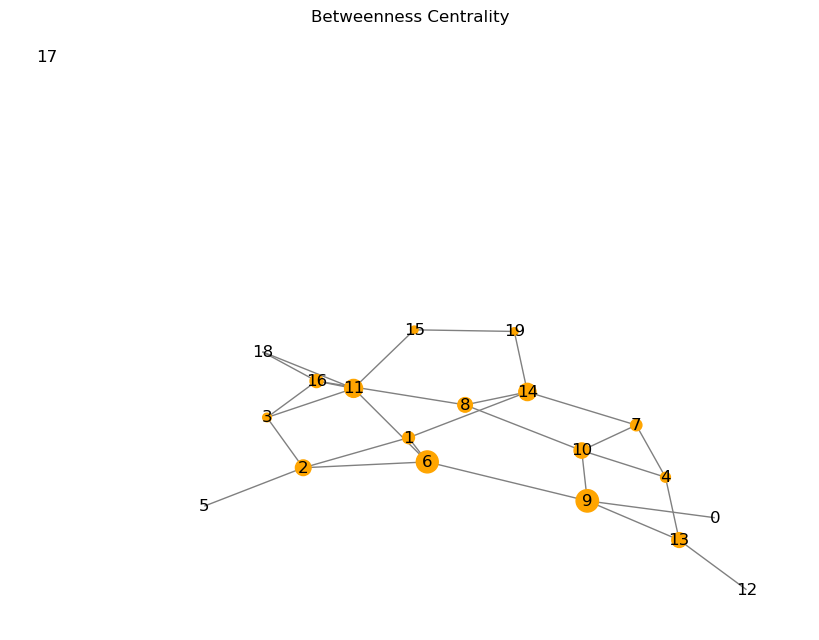

In [17]:
# Generate a random graph
G = nx.erdos_renyi_graph(20, 0.15)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Function to draw graph with centrality measure
def draw_centrality_graph(centrality):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    centrality_values = None
    if centrality == "Degree Centrality":
        centrality_values = degree_centrality
    elif centrality == "Closeness Centrality":
        centrality_values = closeness_centrality
    elif centrality == "Betweenness Centrality":
        centrality_values = betweenness_centrality

    node_size = [v * 1000 for v in centrality_values.values()]
    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color="orange", edge_color="gray")
    plt.title(f"{centrality}")
    plt.show()

# Display centrality options
draw_centrality_graph(centrality = "Betweenness Centrality") #, "Closeness Centrality", "Betweenness Centrality"])

# Exercise 4: Visualizing Network Evolution Over Time
Create a graph that evolves over time by adding one new node in each time step. Connect each new node to some of the previous nodes with a random probability. Visualize each step to show how the graph grows.

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Function to create an evolving graph
def evolving_graph():
    G = nx.Graph()
    
    # Initial empty graph visualization
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=500, node_color="skyblue")
    plt.title("Initial Graph")
    plt.show()

    # Add nodes and edges iteratively
    for t in range(1, 6):
        G.add_node(t)
        if t > 1:
            for neighbor in range(1, t):
                if np.random.rand() < 0.5:  # Random edge probability
                    G.add_edge(t, neighbor)
        
        # Update layout after adding new nodes
        pos = nx.spring_layout(G)  # Recompute layout
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, node_size=500, node_color="skyblue", with_labels=True)
        plt.title(f"Graph at Time Step {t}")
        plt.show()

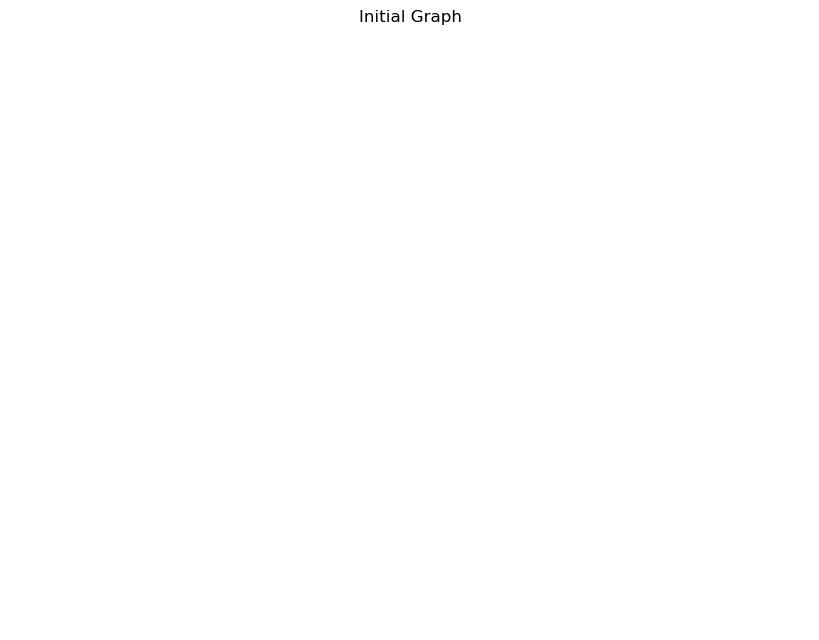

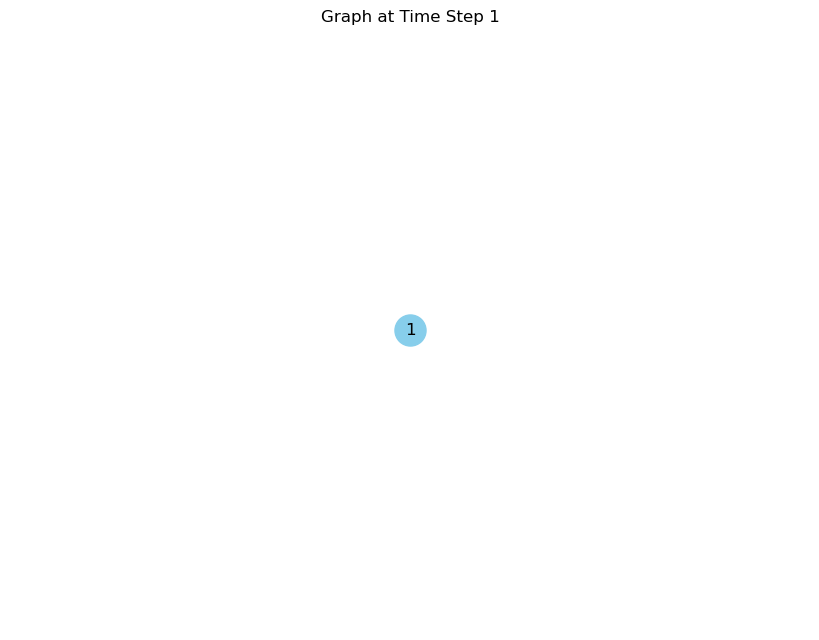

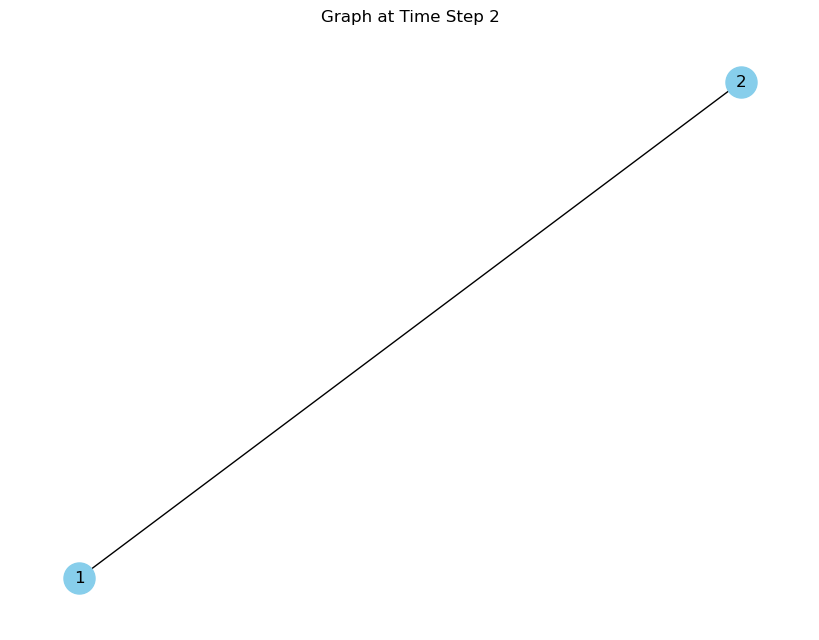

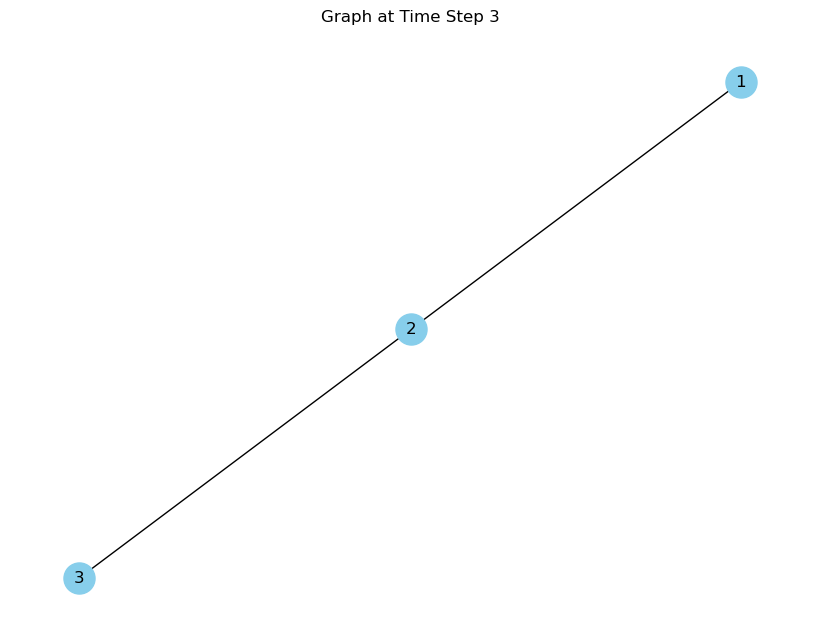

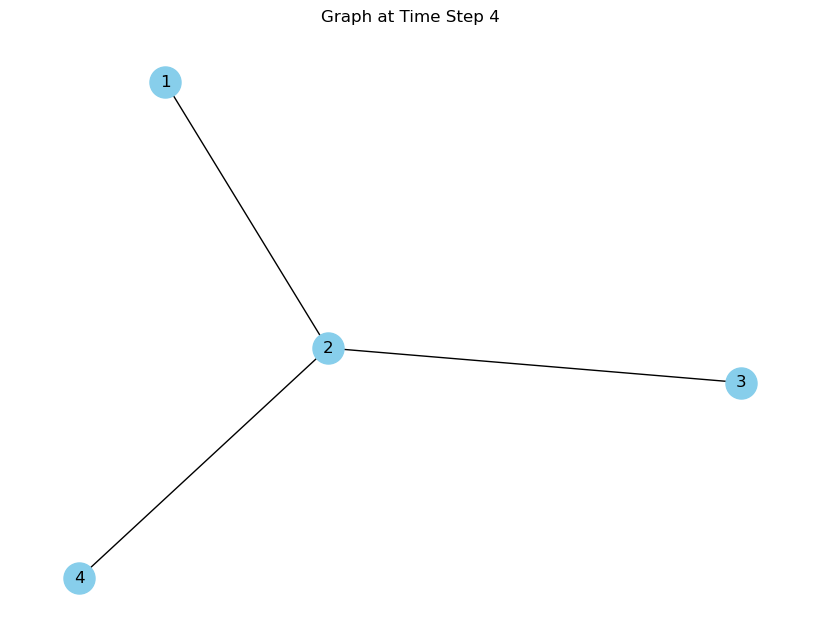

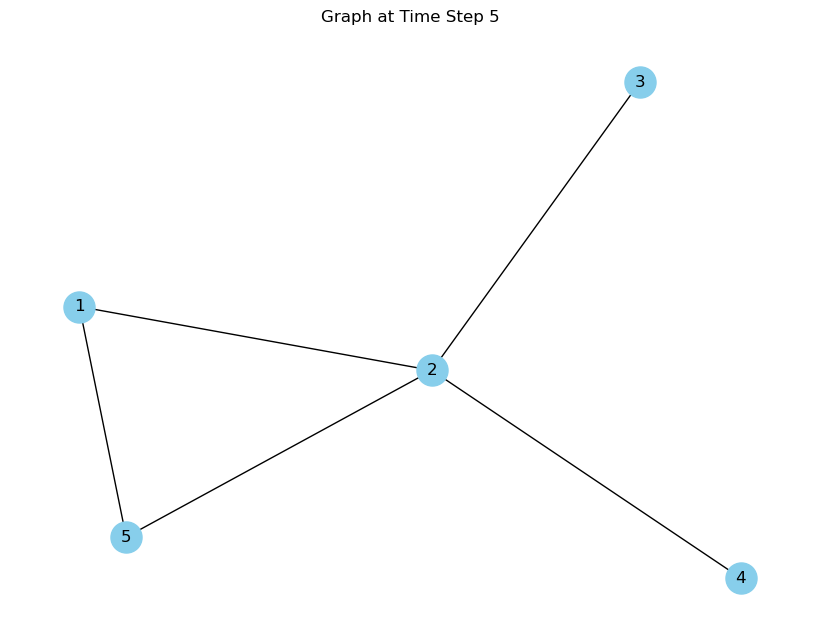

In [9]:
evolving_graph()

# Exercise 5: Visualizing Weighted Graphs with Dynamic Edge Widths
- Create a weighted graph where each edge has a different weight. Visualize the graph with edge thickness varying according to the edge weights to represent connection strength.
- Hint: You can use the below code to generate a sample graph

G = nx.Graph()

edges = [("A", "B", 5), ("A", "C", 2), ("B", "C", 1), ("C", "D", 3), ("A", "D", 4)]

G.add_weighted_edges_from(edges)

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

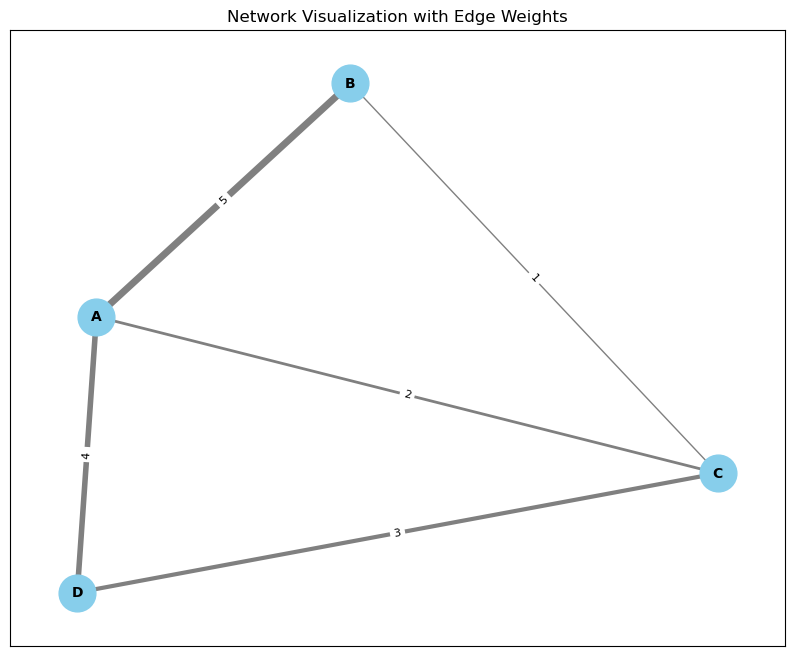

In [11]:
# Create a weighted graph
G = nx.Graph()
edges = [("A", "B", 5), ("A", "C", 2), ("B", "C", 1), ("C", "D", 3), ("A", "D", 4)]
G.add_weighted_edges_from(edges)

# Draw the graph with edge thickness based on weight
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")

# Draw edges with thickness based on weight
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[weight for weight in weights], edge_color="gray")

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Network Visualization with Edge Weights")
plt.show()
